In [39]:
import pandas
import os
import numpy as np

from pprint import pprint
from matplotlib import pyplot as plt

In [40]:
def load_csv(dirname):
    curve = []
    obs1 = []
    obs2 = []
    racing = [
        
        
    ]
    sprint= []

    for (dirpath, dirnames, filenames) in os.walk(dirname):
        if '.ipynb_checkpoints' in dirpath:
            continue
        if 'curve' in dirpath:
            curve += [os.path.join(dirpath, file) for file in filenames]
        if 'obs1' in dirpath:
            obs1 += [os.path.join(dirpath, file) for file in filenames]
        if 'obs2' in dirpath:
            obs2 += [os.path.join(dirpath, file) for file in filenames]
        if 'racing' in dirpath:
            racing += [os.path.join(dirpath, file) for file in filenames]
        if 'sprint' in dirpath:
            sprint += [os.path.join(dirpath, file) for file in filenames]
    
    return [sprint, curve, obs1, obs2, racing]

In [41]:
def load_df(dirlist):
    dflist = []
    for data in dirlist:
        df = pandas.read_csv(data)
        df['exe_time'] = df['exe_time'] * 1000
        dflist.append(df)
    return dflist

In [49]:
# calculation mean value each csv file
def mean_list_calc(dflist):
    mean_list = []
    for i in range(len(dflist)):
        df = dflist[i]
        means_data = {}

    #     last_data = df.iloc[-1]
    #     print(last_data['time'])

    #     plt.title(df_name)
    #     plt.grid()
    #     plt.xlabel("Interval")
    #     plt.ylabel("milliseconds")
    #     plt.rcParams['figure.figsize'] = [12, 8]
    #     plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

        # LP, GP 
        if 'planning' in df.columns:

            df_lp = df.copy()
            df_gp = df.copy()

            mean_lp = np.mean(df_lp[df['planning'] == "lp"]['exe_time'])
            mean_gp = np.mean(df_lp[df['planning'] == "gp"]['exe_time'])

#             print("Mean GP:", mean_gp)
#             print("Mean LP:", mean_lp)

            means_data = {"gp": mean_gp, "lp": mean_lp}

            df_lp[df['planning'] == "gp"] = 0 
            df_gp[df['planning'] == "lp"] = 0 

    #         plt.bar(range(len(df)), df_lp['exe_time'], color="tab:red")
    #         plt.bar(range(len(df)), df_gp['exe_time'], color="tab:blue")
    #         plt.show()

        else:
            mean = np.mean(df['exe_time'])
            
#             print("Mean:", mean)
            
            means_data = {"mean": mean}
    #         plt.bar(range(len(df)), df['exe_time'])
    #         plt.show()



        mean_list.append(means_data)

    return mean_list

In [50]:
def mean_10_calc(mean_list):
    gp = []
    lp = []
    mean = []
    for i in mean_list:
        if list(i.keys()) == ['gp', 'lp']:
            gp.append(i['gp'])
            lp.append(i['lp'])
        if list(i.keys()) == ['mean']:
            mean.append(i['mean'])
    
    
    if len(gp) == 0 and len(lp) == 0:
        mean_v = np.mean(mean)
        return mean_v
        
    
    if len(mean) == 0:
        gp_v = np.mean(gp)
        lp_v = np.mean(lp)
        return [gp_v, lp_v]
    

In [51]:
### all map mean bar plot
def plot_mean_non_queue(dirlist, title):
    mean_list = []
    for i in dirlist:
        _dfs = load_df(i)
        _means = mean_list_calc(_dfs)
        mean_list.append(mean_10_calc(_means))

    columns = ["Sprint","Curve","Obstacle 1","Obstacle 2","Racing"]
    
    x_range = np.arange(5)
    plt.bar(x_range, mean_list)
    plt.xticks(x_range, columns, fontsize=10, rotation=0)
    plt.xlabel("Map(s)")
    plt.ylabel("Milliseconds")
    plt.title(title)
    plt.grid(axis="y")
    plt.ylim(0,6)
    plt.rcParams['figure.figsize'] = [6, 6]
    plt.rcParams['figure.dpi'] = 150 # 200 e.g. is really fine, but slower
    plt.show()
    
    return mean_list

In [52]:
### all map mean bar plot
def plot_mean_queue(dirlist, title):
    mean_list = []
    for i in dirlist:
        _dfs = load_df(i)
        _means = mean_list_calc(_dfs)
        mean_list.append(mean_10_calc(_means))

    columns = ["Sprint","Curve","Obstacle 1","Obstacle 2","Racing"]

    gp_bar = [x[0] for x in mean_list]
    lp_bar = [x[1] for x in mean_list]

    x_range = np.arange(5)
    plt.bar(x_range - 0.2, gp_bar, width=0.4, color="tab:green")
    plt.bar(x_range + 0.2 , lp_bar, width=0.4, color="tab:red")
    plt.ylim(0,6)
    plt.grid(axis="y")
    plt.title(title)
    plt.xticks(x_range, columns, fontsize=10, rotation=0)
    plt.xlabel("Map(s)")
    plt.ylabel("Milliseconds")
    plt.legend(["GP", "LP"])
    plt.rcParams['figure.figsize'] = [6, 6]
    plt.rcParams['figure.dpi'] = 150 # 200 e.g. is really fine, but slower
    plt.show()
    
    return mean_list

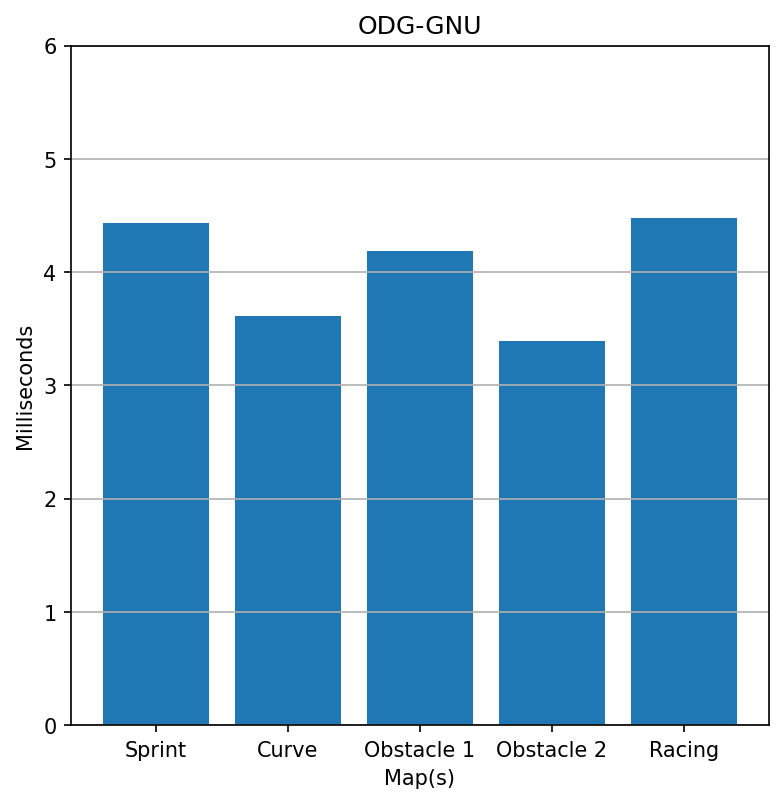

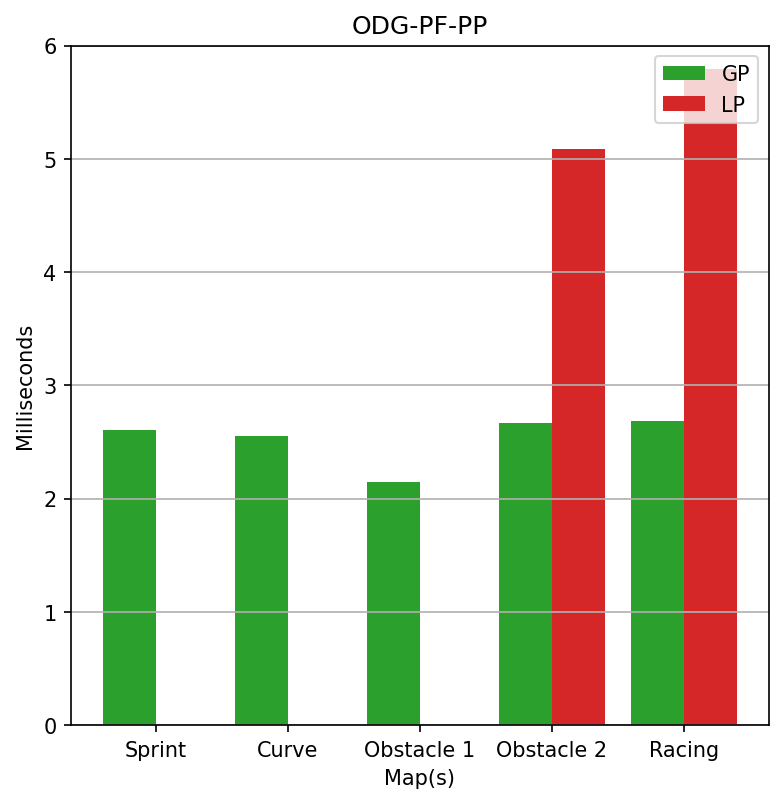

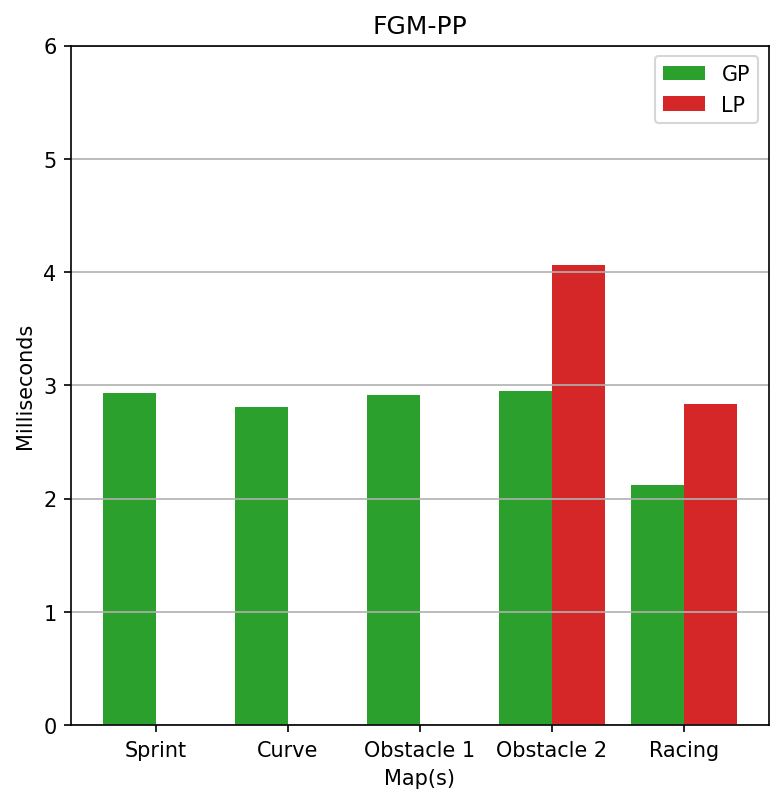

In [11]:
odggnu_dir = load_csv("odg_gnu")
odggnu = plot_mean_non_queue(odggnu_dir, "ODG-GNU")

odgpp_dir = load_csv("odg_pp")
odgpp = plot_mean_queue(odgpp_dir, "ODG-PF-PP")

fgmpp_dir = load_csv("fgm_pp")
fgmpp = plot_mean_queue(fgmpp_dir, "FGM-PP")

In [12]:
def plot_all_map(map_lists, algo_lists):
    columns = ["Sprint","Curve","Obstacle 1","Obstacle 2","Racing"]
    map_dict = {}
    for keys in columns:
        map_dict[keys] = []
    
    for algos, maps in enumerate(map_lists):
        for i, means in enumerate(maps):
            if isinstance(means, float):
                map_dict[columns[i]].append({'algorithm': algo_lists[algos], 'data': {'means': means, 'queued': False}})

            elif isinstance(means, list):
                map_dict[columns[i]].append({'algorithm': algo_lists[algos], 'data': {'means': means, 'queued': True}})
            
    pprint(map_dict)
    # algo1, algo2 ...

    q_bars = []
    q_algo_list = []
    nq_bars = []
    nq_algo_list = []

    for i, a in enumerate(algo_lists):
        q_means = []
        nq_means = []
        for j in columns:
            for k in map_dict[j]:
                if k['algorithm'] == a:
                    if k['data']['queued'] == True:
                        q_means.append(k['data']['means'])
                    else:
                        nq_means.append(k['data']['means'])
        if q_means == []:
            nq_bars.append(nq_means)
            nq_algo_list.append(a)
        if nq_means == []:
            q_bars.append(q_means)
            q_algo_list.append(a+" GP")
            q_algo_list.append(a+" LP")
            
    
    # N-Q
    x_range = np.arange(len(columns))
    if len(nq_algo_list) == 1:
        x_range_plot = [0]
        x_range_div = 0.5
    else:
        x_range_plot = np.linspace(-0.3, 0.3, len(nq_algo_list))
        x_range_div = x_range_plot[-1] - x_range_plot[-2]

                
    for i, v in enumerate(nq_bars):
        plt.bar(x_range + x_range_plot[i], v, width=x_range_div)
    plt.legend(nq_algo_list, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(x_range, columns, fontsize=10, rotation=0)
    plt.xlabel("Map(s)")
    plt.ylabel("Milliseconds")
    plt.ylim(0,6)
    plt.rcParams['figure.figsize'] = [6, 6]
    plt.rcParams['figure.dpi'] = 150 # 200 e.g. is really fine, but slower
    plt.title("Non-Queue Algorithm")
    plt.grid(axis="y")
    plt.show()
    
    # Q
    x_range = np.arange(len(columns))
    if len(q_algo_list) == 1:
        x_range_plot = [0]
        x_range_div = 0.5
    else:
        x_range_plot = np.linspace(-0.3, 0.3, len(q_algo_list))
        x_range_div = x_range_plot[-1] - x_range_plot[-2]


    i = 0
    for v in q_bars:
        v = np.array(v)
        plt.bar(x_range + x_range_plot[i], v[:, 0], width=x_range_div)
        i+=1
        plt.bar(x_range + x_range_plot[i], v[:, 1], width=x_range_div)
        i+=1
        
    plt.legend(q_algo_list, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(x_range, columns, fontsize=10, rotation=0)
    plt.xlabel("Map(s)")
    plt.grid(axis="y")
    plt.ylim(0,6)
    plt.rcParams['figure.figsize'] = [6, 6]
    plt.rcParams['figure.dpi'] = 150 # 200 e.g. is really fine, but slower
    plt.title("Queue based Algorithm")
    plt.ylabel("Milliseconds")
    plt.show()

{'Curve': [{'algorithm': 'ODG-GNU',
            'data': {'means': 3.608602440232849, 'queued': False}},
           {'algorithm': 'ODG-PF-PP',
            'data': {'means': [2.5533060208790115, nan], 'queued': True}},
           {'algorithm': 'FGM-PP',
            'data': {'means': [2.806084841893921, nan], 'queued': True}}],
 'Obstacle 1': [{'algorithm': 'ODG-GNU',
                 'data': {'means': 4.188707984876051, 'queued': False}},
                {'algorithm': 'ODG-PF-PP',
                 'data': {'means': [2.1429019494781385, nan], 'queued': True}},
                {'algorithm': 'FGM-PP',
                 'data': {'means': [2.912169022403152, nan], 'queued': True}}],
 'Obstacle 2': [{'algorithm': 'ODG-GNU',
                 'data': {'means': 3.3952548443681096, 'queued': False}},
                {'algorithm': 'ODG-PF-PP',
                 'data': {'means': [2.6706345809705567, 5.08883824288799],
                          'queued': True}},
                {'algorithm': 'FGM-PP',

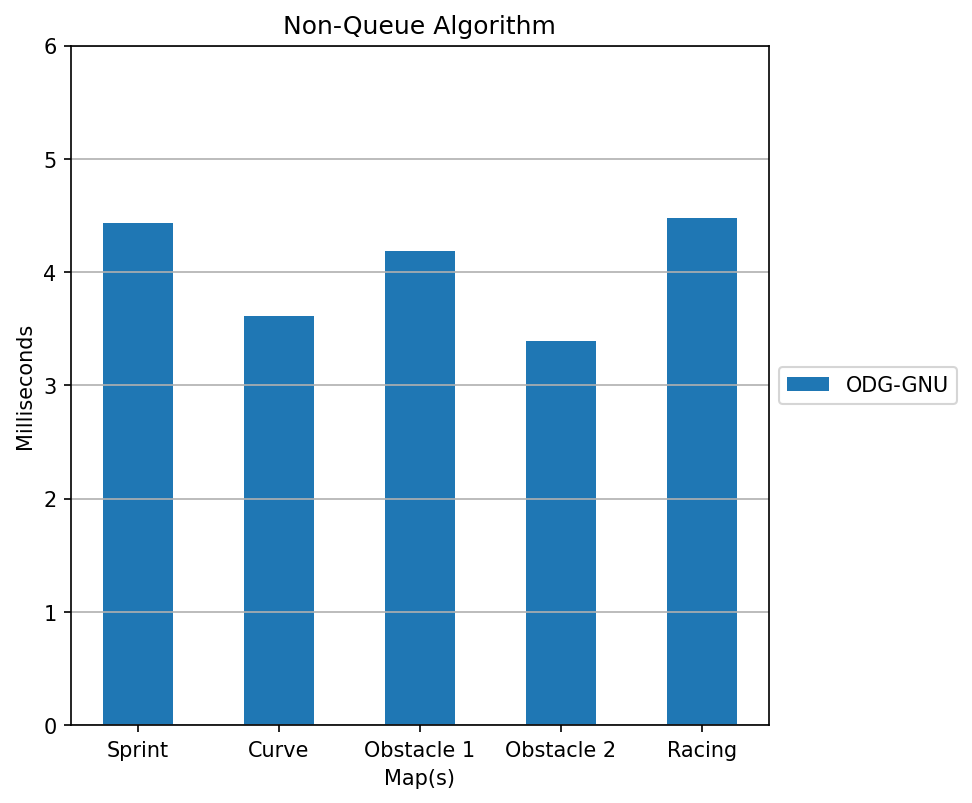

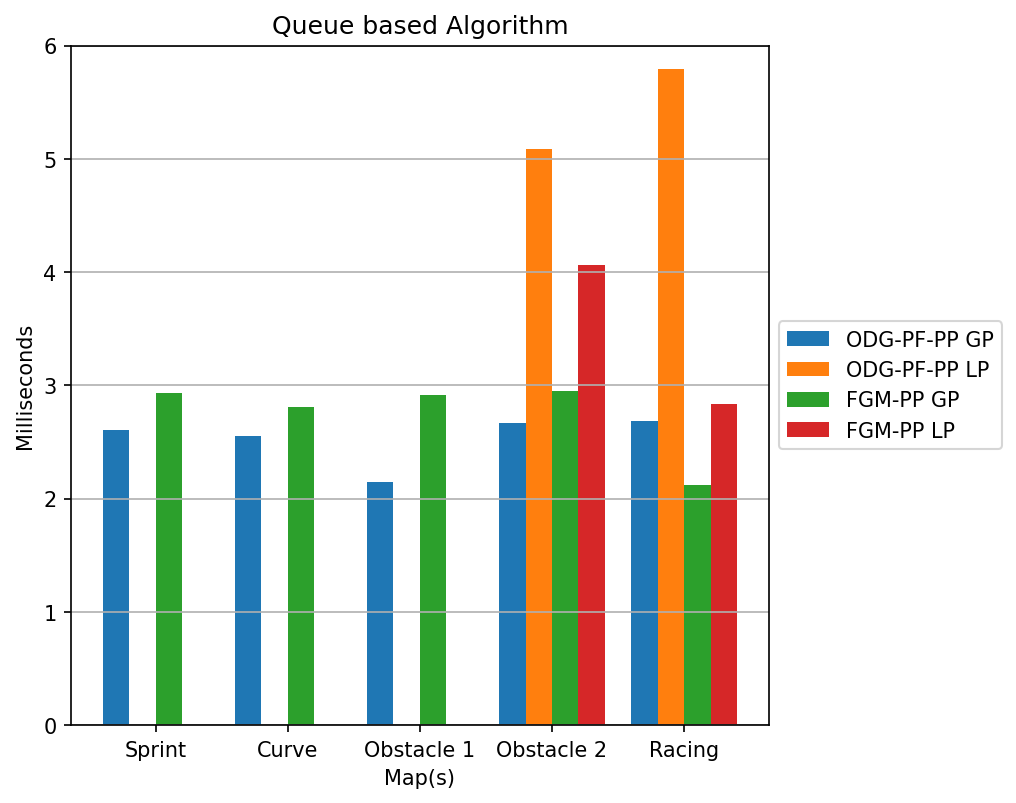

In [14]:
map_lists = [odggnu, odgpp, fgmpp]
algo_lists = ["ODG-GNU", "ODG-PF-PP", "FGM-PP"]
plot_all_map(map_lists, algo_lists)